<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/how-to-train-ultralytics-yolo-on-carparts-segmentation-dataset.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>


  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the Carparts segmentation using Ultralytics YOLO11 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLO11</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope that the resources in this notebook will help you get the most out of YOLO11. Please browse the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!</div>

# Carparts Segmentation using Ultralytics YOLO11

This notebook serves as a starting point for training the YOLO11 model on [carparts](https://docs.ultralytics.com/datasets/segment/carparts-seg/) segmentation dataset.

## Dataset Structure

The data distribution within the Carparts Segmentation Dataset is organized as outlined below:

- **Training set**: Includes 3156 images, each accompanied by its corresponding annotations.
- **Testing set**: Comprises 276 images, with each one paired with its respective annotations.
- **Validation set**: Consists of 401 images, each having corresponding annotations.

## Applications

Carparts Segmentation finds applications in automotive quality control, auto repair, e-commerce cataloging, traffic monitoring, autonomous vehicles, insurance processing, recycling, and smart city initiatives. It streamlines processes by accurately identifying and categorizing different vehicle components, contributing to efficiency and automation in various industries.

## Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://www.pepy.tech/projects/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


## Dataset YAML File

A YAML (Yet Another Markup Language) file defines the dataset configuration, including paths, classes, and other pertinent details. 😀

```yaml
# Ultralytics YOLO 🚀, AGPL-3.0 license
# Carparts-seg dataset by Ultralytics
# Documentation: https://docs.ultralytics.com/datasets/segment/carparts-seg/
# Example usage: yolo train data=carparts-seg.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── carparts-seg  ← downloads here (132 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/carparts-seg # dataset root dir
train: train/images # train images (relative to 'path') 3516 images
val: valid/images # val images (relative to 'path') 276 images
test: test/images # test images (relative to 'path') 401 images

# Classes
names:
  0: back_bumper
  1: back_door
  2: back_glass
  3: back_left_door
  4: back_left_light
  5: back_light
  6: back_right_door
  7: back_right_light
  8: front_bumper
  9: front_door
  10: front_glass
  11: front_left_door
  12: front_left_light
  13: front_light
  14: front_right_door
  15: front_right_light
  16: hood
  17: left_mirror
  18: object
  19: right_mirror
  20: tailgate
  21: trunk
  22: wheel

# Download script/URL (optional)
download: https://github.com/ultralytics/assets/releases/download/v0.0.0/carparts-seg.zip
```

## Train

Train YOLO11 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLO11 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="carparts-seg.yaml", epochs=10, imgsz=640, batch=32, workers=64)

100%|██████████| 5.90M/5.90M [00:00<00:00, 373MB/s]

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=carparts-seg.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=Tru

100%|██████████| 133M/133M [00:03<00:00, 40.1MB/s]
Unzipping /content/datasets/carparts-seg.zip to /content/datasets/carparts-seg...: 100%|██████████| 7671/7671 [00:01<00:00, 4461.77file/s]

Dataset download success ✅ (7.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 99.1MB/s]

Overriding model.yaml nc=80 with nc=23

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

YOLO11n-seg summary: 203 layers, 2,847,093 parameters, 2,847,077 gradients, 10.4 GFLOPs

Transferred 510/561 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 311MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1282.2±565.9 MB/s, size: 35.6 KB)


train: Scanning /content/datasets/carparts-seg/train/labels... 3156 images, 116 backgrounds, 0 corrupt: 100%|██████████| 3156/3156 [00:01<00:00, 1653.39it/s]


train: New cache created: /content/datasets/carparts-seg/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 889.7±519.3 MB/s, size: 39.3 KB)


val: Scanning /content/datasets/carparts-seg/valid/labels... 401 images, 12 backgrounds, 0 corrupt: 100%|██████████| 401/401 [00:00<00:00, 794.13it/s]

val: New cache created: /content/datasets/carparts-seg/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00037, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.68G      1.324      2.777      4.072      1.478        111        640: 100%|██████████| 99/99 [01:13<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        401       2042      0.836     0.0868      0.139      0.101      0.835     0.0863       0.14     0.0987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.89G      1.062       1.91      2.479      1.227        107        640: 100%|██████████| 99/99 [01:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


                   all        401       2042      0.552      0.417      0.336      0.248      0.555      0.422      0.341      0.237

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.92G     0.9416      1.653      1.655      1.136         86        640: 100%|██████████| 99/99 [01:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


                   all        401       2042       0.55      0.517      0.469       0.34      0.558      0.519      0.469      0.319

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.93G     0.8742      1.523      1.379      1.092        102        640: 100%|██████████| 99/99 [01:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        401       2042      0.491      0.562        0.5      0.383      0.504       0.56      0.506      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      6.95G     0.8198      1.406      1.217      1.051        103        640: 100%|██████████| 99/99 [01:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]


                   all        401       2042      0.589      0.693      0.614      0.478      0.608      0.675      0.623      0.453

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.96G     0.7749      1.317        1.1      1.031        111        640: 100%|██████████| 99/99 [01:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        401       2042      0.526      0.735       0.61      0.484      0.528      0.733      0.618      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.98G     0.7433      1.248      1.019      1.003         83        640: 100%|██████████| 99/99 [01:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        401       2042       0.59      0.752       0.65      0.517      0.594      0.784      0.667      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.99G     0.7101      1.197     0.9504     0.9874         94        640: 100%|██████████| 99/99 [01:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        401       2042      0.578      0.793      0.661      0.535      0.579      0.794      0.671      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.02G     0.6796       1.14     0.9023     0.9674        121        640: 100%|██████████| 99/99 [01:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        401       2042      0.573      0.745      0.639      0.518      0.578      0.751      0.647      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.02G     0.6494      1.094     0.8566     0.9594         88        640: 100%|██████████| 99/99 [01:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        401       2042      0.588      0.793      0.674      0.553      0.591      0.808      0.689      0.526



10 epochs completed in 0.199 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,839,053 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:01<00:08,  1.48s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:04<00:12,  2.43s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.62s/it]


                   all        401       2042      0.588      0.794      0.674      0.553      0.592      0.801      0.689      0.526
           back_bumper         94         94      0.829       0.98       0.93      0.754      0.829      0.982      0.929      0.706
             back_door        158        159      0.758      0.928      0.908      0.784      0.759      0.931      0.911      0.752
            back_glass        114        115      0.877      0.929      0.935      0.807      0.877       0.93      0.935      0.774
        back_left_door         15         15      0.522        0.8       0.51      0.438       0.52        0.8       0.51      0.366
       back_left_light         19         19      0.452      0.684      0.482      0.368      0.483      0.737      0.573      0.394
            back_light        161        226      0.828      0.828      0.832      0.618      0.833      0.841      0.843      0.592
       back_right_door         12         12       0.45      0.833   

![Dataset sample image](https://github.com/ultralytics/docs/releases/download/0/dataset-sample-image.avif)

## Predict

YOLO11 may be used directly in the Command Line Interface (CLI) with a yolo command for a variety of tasks and modes and accepts additional arguments, i.e. imgsz=640. See a full list of available [yolo arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).

In [12]:
# Step 1: Setup and imports
!pip install -q ultralytics opencv-python numpy scikit-learn matplotlib

import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt
from collections import Counter

# Step 2: Load your trained YOLOv8 segmentation model
model = YOLO("runs/segment/train/weights/best.pt")

# Step 3: Define class names (from your data.yaml)
class_names = ['Birdpoop', 'background', 'cars', 'clean surface', 'dirt', 'dust', 'glass', 'puddle', 'road', 'wiper']

# Step 4: Run inference on check.jpg
start_time = time.time()
results = model.predict("/content/runs/check.jpg", conf=0.25)
inference_time = time.time() - start_time

# Step 5: Check for detections
if results[0].masks is None:
    print("\n⚠️ No objects detected in check.jpg")
    print("This means the model found no dirt or dust.")
    print(f"Inference Time: {inference_time:.2f} seconds")
else:
    # Step 6: Extract predicted masks and class IDs
    pred_masks = results[0].masks.data.cpu().numpy()  # shape: (num_objects, H, W)
    pred_classes = results[0].boxes.cls.cpu().numpy().astype(int)

    # Step 7: Create a combined predicted mask with class IDs as pixel values
    pred_mask_combined = np.zeros(pred_masks.shape[1:], dtype=np.uint8)
    for idx, class_id in enumerate(pred_classes):
        pred_mask_combined[pred_masks[idx] > 0.5] = class_id

    # Step 8: Load ground truth mask image
    gt_mask = cv2.imread("/content/check_mask.png", cv2.IMREAD_GRAYSCALE)
    gt_mask_resized = cv2.resize(gt_mask, (pred_mask_combined.shape[1], pred_mask_combined.shape[0]))

    # Step 9: Flatten both masks
    y_true = gt_mask_resized.flatten()
    y_pred = pred_mask_combined.flatten()

    # Step 10: Filter for dirt and dust classes only (class IDs 4 and 5)
    target_classes = [4, 5]
    mask = np.isin(y_true, target_classes)
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]

    # Step 11: Compute classification metrics
    print("=== Classification Report (Dirt & Dust Only) ===")
    print(classification_report(
        y_true_filtered,
        y_pred_filtered,
        target_names=[class_names[i] for i in target_classes],
        zero_division=0
    ))

    precision = precision_score(y_true_filtered, y_pred_filtered, average='weighted', zero_division=0)
    recall = recall_score(y_true_filtered, y_pred_filtered, average='weighted', zero_division=0)
    f1 = f1_score(y_true_filtered, y_pred_filtered, average='weighted', zero_division=0)

    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Inference Time: {inference_time:.2f} seconds")

    # Step 12: Area per class in predicted mask
    areas = Counter()
    for idx, class_id in enumerate(pred_classes):
        area = np.sum(pred_masks[idx])
        areas[class_names[class_id]] += int(area)

    print("\n=== Class-wise Area in Pixels ===")
    for cls, area in areas.items():
        print(f"{cls}: {area} px")

    # Step 13: Display combined predicted mask
    plt.figure(figsize=(10, 5))
    plt.imshow(pred_mask_combined, cmap='tab10')
    plt.title("Predicted Segmentation Mask")
    plt.axis("off")
    plt.show()



image 1/1 /content/runs/check.jpg: 352x640 1 back_left_door, 1 back_right_door, 1 front_bumper, 1 front_glass, 1 front_left_door, 2 front_left_lights, 1 front_right_door, 2 front_right_lights, 1 hood, 3 wheels, 62.4ms
Speed: 1.9ms preprocess, 62.4ms inference, 21.0ms postprocess per image at shape (1, 3, 352, 640)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [15]:
!pip install -q ultralytics opencv-python scikit-learn matplotlib

import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your fine-tuned segmentation model
model = YOLO("/content/runs/segment/train/weights/best.pt")

# Image URL to run inference on
image_url = "https://github.com/ultralytics/assets/releases/download/v0.0.0/carparts-image.jpg"

# Run inference and measure time
start_time = time.time()
results = model.predict(image_url, save=True)
inference_time = time.time() - start_time
print(f"Inference Time: {inference_time:.3f} seconds")

# Check if model detected any masks
if results[0].masks is None:
    print("No objects detected.")
else:
    # Extract predicted masks and classes
    pred_masks = results[0].masks.data.cpu().numpy()  # shape (num_instances, H, W)
    pred_classes = results[0].boxes.cls.cpu().numpy().astype(int)

    # Combine masks into one mask with pixel values = class ids
    pred_mask_combined = np.zeros(pred_masks.shape[1:], dtype=np.uint8)
    for i, cls_id in enumerate(pred_classes):
        pred_mask_combined[pred_masks[i] > 0.5] = cls_id

    # Load ground truth mask (grayscale) and resize to prediction size
    gt_mask_path = "path_to_ground_truth_mask.png"  # <-- Change this!
    gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
    gt_mask_resized = cv2.resize(gt_mask, (pred_mask_combined.shape[1], pred_mask_combined.shape[0]))

    # Flatten masks for metric calculation
    y_true = gt_mask_resized.flatten()
    y_pred = pred_mask_combined.flatten()

    # Calculate metrics
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    # Visualize predicted mask
    plt.figure(figsize=(10, 5))
    plt.imshow(pred_mask_combined, cmap='tab10')
    plt.title("Predicted Segmentation Mask")
    plt.axis('off')
    plt.show()



Found https://github.com/ultralytics/assets/releases/download/v0.0.0/carparts-image.jpg locally at carparts-image.jpg
image 1/1 /content/carparts-image.jpg: 384x640 1 front_bumper, 1 front_glass, 1 front_left_door, 1 front_left_light, 1 front_right_door, 2 front_right_lights, 1 hood, 1 left_mirror, 1 right_mirror, 6 wheels, 20.5ms
Speed: 3.2ms preprocess, 20.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
Inference Time: 0.260 seconds


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Found https://github.com/ultralytics/assets/releases/download/v0.0.0/carparts-image.jpg locally at carparts-image.jpg
image 1/1 /content/carparts-image.jpg: 384x640 1 front_bumper, 1 front_glass, 1 front_left_door, 1 front_left_light, 1 front_right_door, 2 front_right_lights, 1 hood, 1 left_mirror, 1 right_mirror, 6 wheels, 39.7ms
Speed: 8.3ms preprocess, 39.7ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict4
Inference time: 0.618 seconds


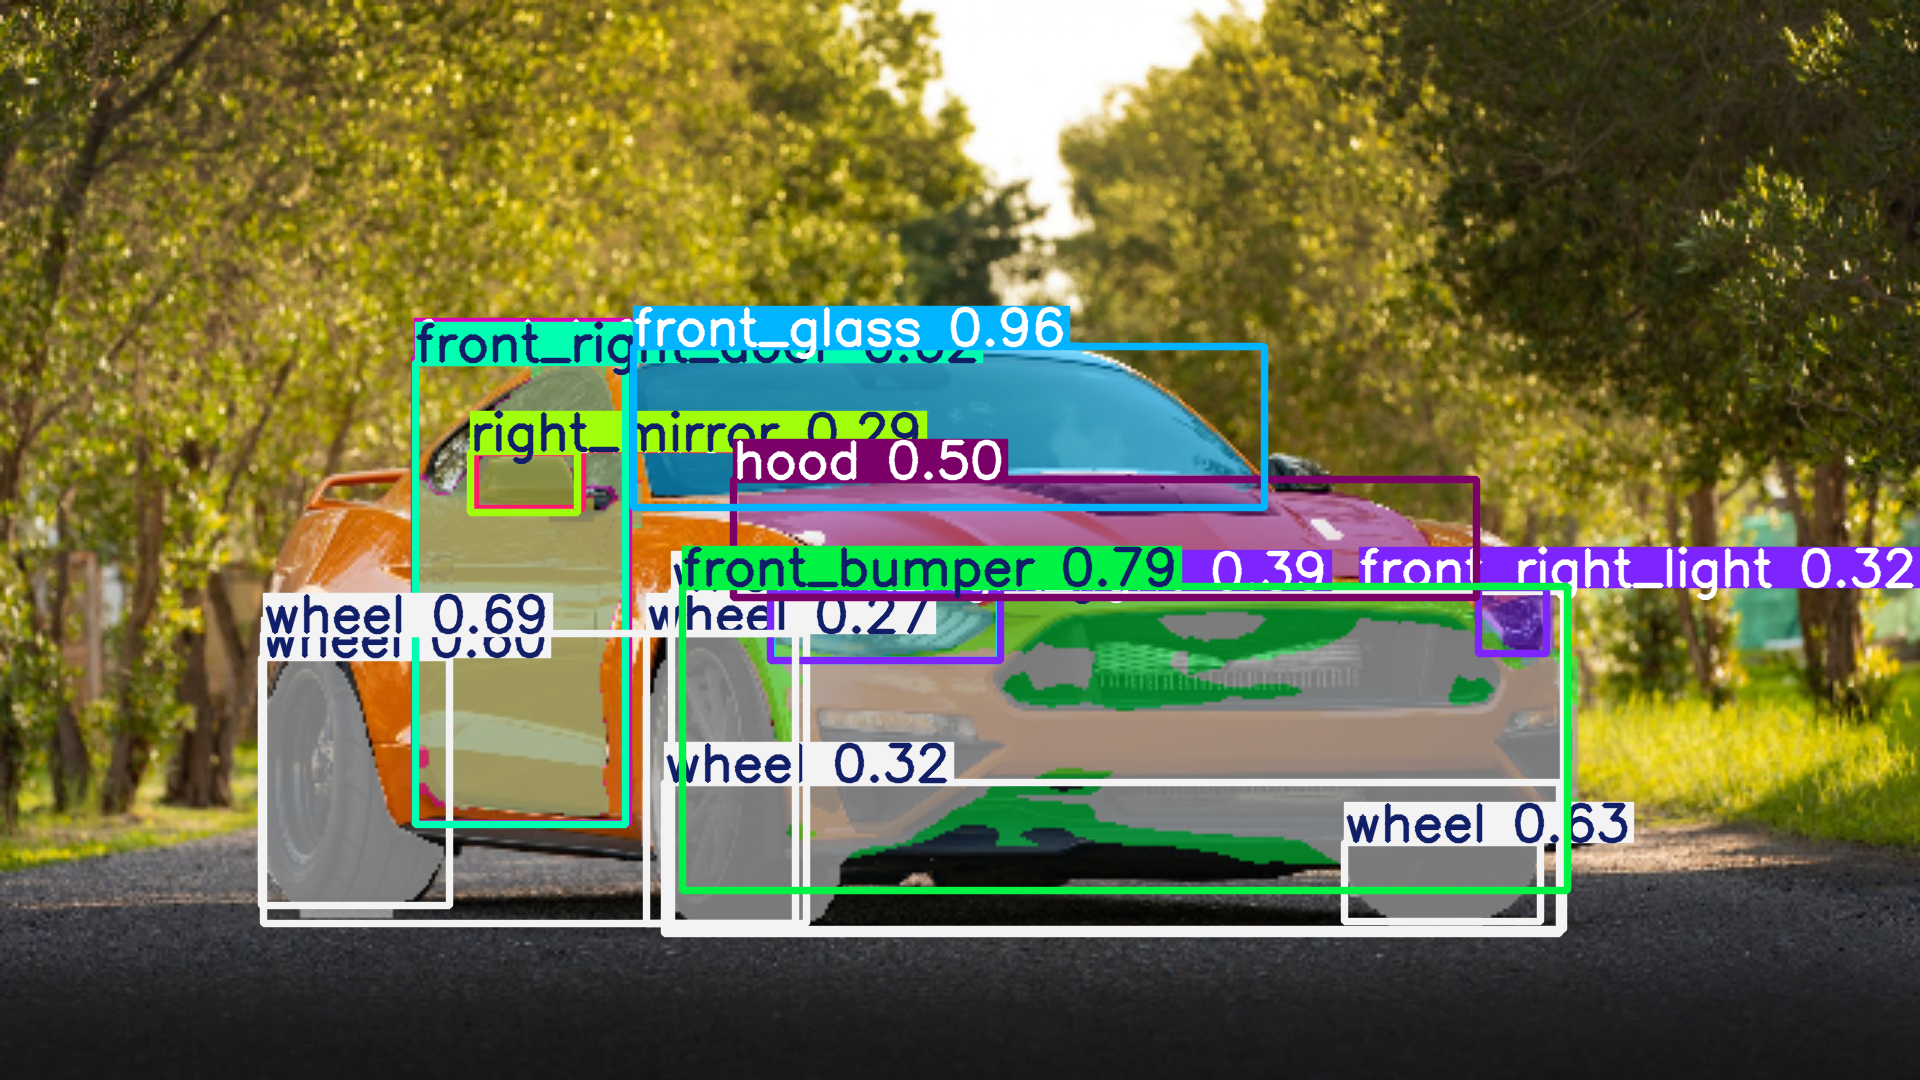

Precision: 0.000
Recall: 0.000
F1 Score: 0.000


In [18]:
from ultralytics import YOLO
import time
import numpy as np

# Helper function to compute IoU between two boxes
def bbox_iou(box1, box2):
    # box = [x1, y1, x2, y2]
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = inter_area / (box1_area + box2_area - inter_area + 1e-6)
    return iou

# Load model
model = YOLO("/content/runs/segment/train/weights/best.pt")

# Run inference
start = time.time()
results = model.predict("https://github.com/ultralytics/assets/releases/download/v0.0.0/carparts-image.jpg", save=True)
end = time.time()
print(f"Inference time: {end - start:.3f} seconds")

results[0].show()  # visualize predictions

# --- Manual evaluation on single image ---

# Example ground truth boxes and classes (replace with your GT data)
# Format: [x1, y1, x2, y2] in pixel coords, class_id as int
gt_boxes = [
    [50, 100, 200, 300],  # example box 1
    [220, 150, 370, 400], # example box 2
    # Add your GT boxes here
]
gt_classes = [3, 5]  # example class IDs matching above boxes

# Predicted boxes and classes
pred_boxes = results[0].boxes.xyxy.cpu().numpy()  # numpy array shape (N,4)
pred_classes = results[0].boxes.cls.cpu().numpy().astype(int)

# IoU threshold for matching
iou_threshold = 0.5

# Match predictions to GT
matched_gt = set()
tp = 0
fp = 0

for pred_box, pred_cls in zip(pred_boxes, pred_classes):
    match_found = False
    for i, (gt_box, gt_cls) in enumerate(zip(gt_boxes, gt_classes)):
        if i in matched_gt:
            continue
        if pred_cls == gt_cls:
            iou = bbox_iou(pred_box, gt_box)
            if iou >= iou_threshold:
                tp += 1
                matched_gt.add(i)
                match_found = True
                break
    if not match_found:
        fp += 1

fn = len(gt_boxes) - len(matched_gt)

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


In [19]:
print("Predicted boxes and classes:")
for box, cls in zip(pred_boxes, pred_classes):
    print(f"Class: {cls}, Box: {box}")


Predicted boxes and classes:
Class: 10, Box: [     633.83      346.42      1264.2      507.56]
Class: 8, Box: [     682.85      586.15      1567.4      890.65]
Class: 22, Box: [     263.72      633.91      795.37      923.01]
Class: 22, Box: [     1344.3      842.79      1540.6      921.88]
Class: 14, Box: [     415.33      362.18      625.53      824.19]
Class: 22, Box: [     261.91      657.75       449.8      905.98]
Class: 11, Box: [     414.11      358.71       628.7      823.68]
Class: 16, Box: [     733.62       479.9      1476.4      597.81]
Class: 15, Box: [     770.36      590.07      1000.7       660.1]
Class: 22, Box: [     664.24      782.51      1559.6      933.46]
Class: 15, Box: [       1479      587.67      1546.9      653.22]
Class: 22, Box: [     671.63      591.26      1563.4      929.54]
Class: 19, Box: [     470.66      451.95      577.52      512.24]
Class: 22, Box: [     646.83       633.3      806.41       923.8]
Class: 17, Box: [     475.96      452.81      58

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/user-attachments/assets/436ded05-9203-4bb7-883b-f7a1f9a399c1" width="600">

## Export

Export a YOLO11 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLO11 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolo11n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolo11n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolo11n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolo11n_openvino_model/` | ✅        | `imgsz`, `half`, `dynamic`, `int8`, `batch`                          |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolo11n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolo11n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolo11n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolo11n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolo11n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolo11n_edgetpu.tflite`  | ✅        | `imgsz`                                                              |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolo11n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolo11n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [MNN](https://docs.ultralytics.com/integrations/mnn)                     | `mnn`             | `yolo11n.mnn`             | ✅        | `imgsz`, `batch`, `int8`, `half`                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolo11n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500)          | `imx`             | `yolov8n_imx_model/`      | ✅        | `imgsz`, `int8`                                                      |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn)          | `rknn`            | `yolo11n_rknn_model/`     | ✅        | `imgsz`, `batch`, `name`                                             |

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/path/to/best.pt")  # load a custom trained model

# Export the model
model.export(format="onnx")

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 265 layers, 2,839,053 parameters, 0 gradients, 10.2 GFLOPs

PyTorch: starting from '/content/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 59, 8400), (1, 32, 160, 160)) (5.7 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.47...
ONNX: export success ✅ 2.7s, saved as '/content/runs/segment/train/weights/best.onnx' (11.1 MB)

Export complete (4.6s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=/content/runs/segment/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=/content/runs/segment/train/weights/best.onnx imgsz=640 data=/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/datasets/carparts-seg.yaml  
Visualize:       https://netron.app


'/content/runs/segment/train/weights/best.onnx'